# Question 2

In [19]:
# import libaries and set the seed
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1257)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

a)

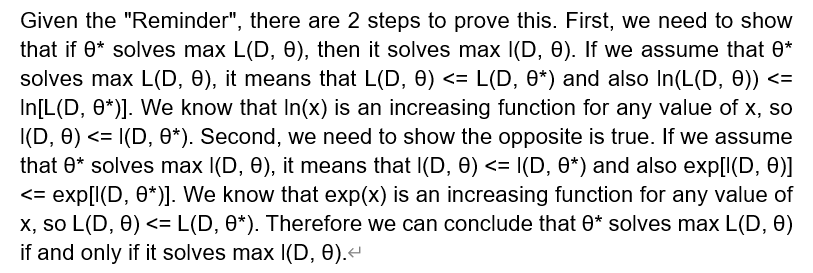

b)

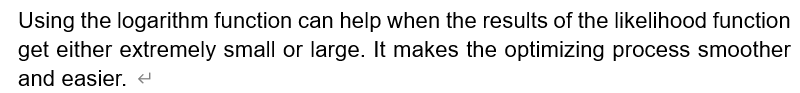

c)

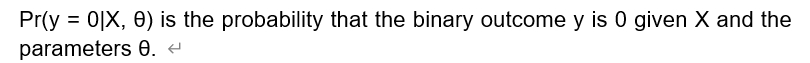

d)

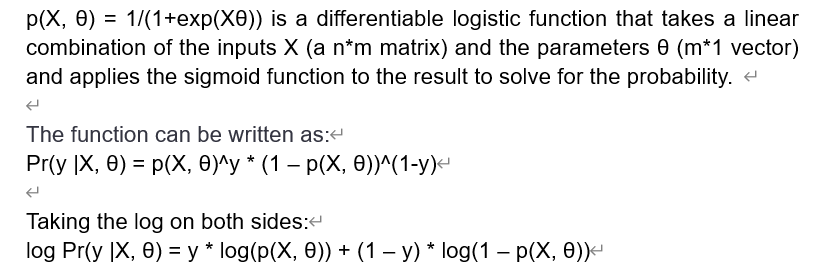

e)

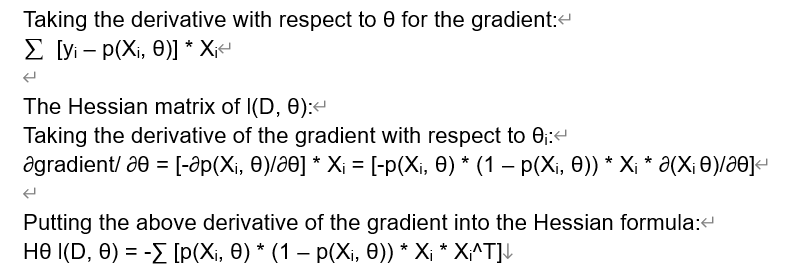

f)

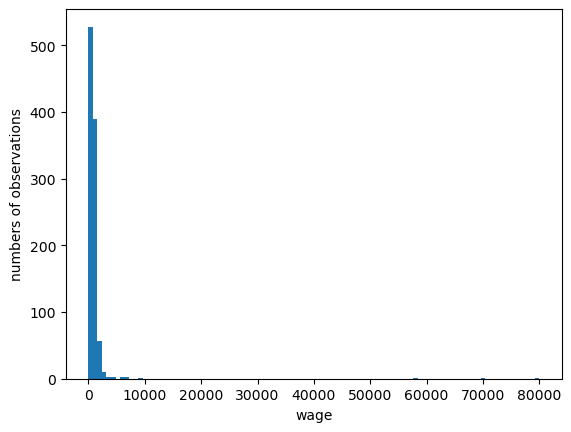

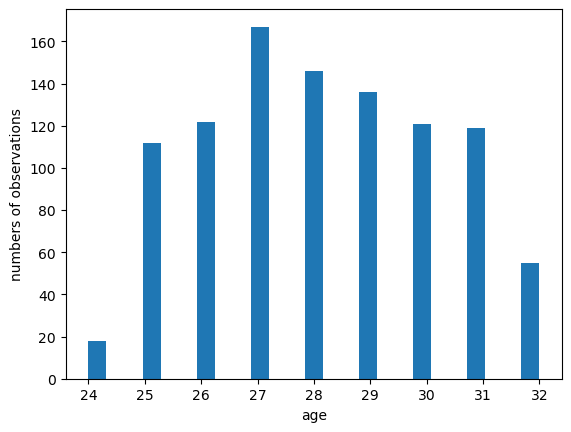

The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.


In [20]:
df = pd.read_csv(r'C:\Users\HP\Desktop\University of Edinburgh\Junior 2nd sem\Programming for Economics\problem sets\5\data.csv')
# plot something informative
# the distribution of wage
plt.hist(df['wage'], bins=100)
plt.xlabel('wage')
plt.ylabel('numbers of observations')
plt.show()

# the distribution of age
plt.hist(df['age'], bins=25)
plt.xlabel('age')
plt.ylabel('numbers of observations')
plt.show()

print("The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.")

g)

In [21]:
# ===== g =====
# function that creates dummies
def dummies(data, var, dummy_name, val):
    if var == "eduyrs":
        # we assign 1 to the education dummy for those with college education for simplicity
        data[dummy_name] = data[var].str.contains("COL").astype(int)
    if var == "welfare":
        data[dummy_name] = data[var].str.contains("YES").astype(int)
    else:
        data[dummy_name] = data[var].apply(lambda x: 1 if x == val else 0)
    return data

# modify the dataframe
# create dummies
df = dummies(df, "sex", "female_dummy", "FEMALE")
df = dummies(df, "race", "white_dummy", "WHITE")
df = dummies(df, "marital", "married_dummy", "MARRIED")
df = dummies(df, "eduyrs", "college_dummy", "blah")
df = dummies(df, "welfare", "welfare_dummy", "blah")
df = dummies(df, "region", "northcentral_dummy", "NORTH CENTRAL")
df = dummies(df, "region", "northeast_dummy", "NORTHEAST")
df = dummies(df, "region", "south_dummy", "SOUTH")
df = dummies(df, "urban", "urban_dummy", "URBAN")
df = dummies(df, "unemprate", "high_unemprate_dummy", "9.0 - 11.9\%")
df = dummies(df, "empstat", "employed", "EMPLOYED")

# drop variables no long needed
df = df.drop(['sex', 'race', 'tenure', 'marital', 'eduyrs', 'welfare', 'region', 'urban', 'unemprate', 'empstat'], axis=1)

In [24]:
# select the predictors and response variable
X = df[['age', 'female_dummy', 'white_dummy', 'married_dummy', 'famsize', 'college_dummy', 'IQ', 'childsupp', 'welfare_dummy', 'northcentral_dummy', 'northeast_dummy', 'south_dummy', 'urban_dummy', 'high_unemprate_dummy']]
y = df['employed']

# print(X)
# print(y)

# functions for the gradient and Hessian found in previous sections

def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

def gradient(thetas, X, y):
    p = logistic(X.dot(thetas))
    grad = X.T.dot(y - p)
    return grad

def log_likelihood(thetas, X, y):
    p = logistic(X.dot(thetas))
    ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    return ll

In [27]:
# set the arrays
X = np.array(X)
y = np.array(y)
# print(X)
theta = np.zeros(X.shape[1])
theta = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
theta0 = theta
# print(theta0)
result = minimize(lambda b: -log_likelihood(b, X, y), theta0, method='BFGS', jac=lambda b: -gradient(b, X, y))
theta_hat = result.x
print(theta_hat.astype(int))

[215   2   5   3  19   0 694 735   0   1   2   3   5   0]


C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:20: RuntimeWarning: divide by zero encountered in log
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:20: RuntimeWarning: invalid value encountered in multiply
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19948\2253816865.py:2

In [28]:
# use finite differences implementation

# the log-likelihood function to be maximized
def log_likelihood(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# function that computes the gradient using finite differences
def compute_gradient(f, theta, h=0.001):
    grad = np.zeros(theta.shape)
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        grad[i] = (f(theta_plus) - f(theta_minus)) / (2 * h)
    return grad


# function that computes the Hessian using finite differences
def compute_hessian(f, theta, h=0.001):
    n = len(theta)
    hessian = np.zeros((n, n))
    for i in range(n):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        for j in range(i, n):
            theta_plus_j = theta_plus.copy()
            theta_plus_j[j] += h
            theta_minus_j = theta_minus.copy()
            theta_minus_j[j] -= h
            hessian[i, j] = (f(theta_plus_j) - f(theta_plus) - f(theta_minus_j) + f(theta_minus)) / (4 * h**2)
            hessian[j, i] = hessian[i, j]
    return hessian


# set the parameters
n = 996
p = 5
X = np.random.normal(size=(n, p))
theta0 = np.random.normal(size=p)
y = np.random.binomial(n=1, p=1 / (1 + np.exp(-X @ theta0)))

# Compute the gradient and Hessian at the true parameter values
grad_fd = compute_gradient(lambda theta: -log_likelihood(theta, X, y), theta0)
hess_fd = compute_hessian(lambda theta: -log_likelihood(theta, X, y), theta0)

print("Finite difference gradient:\n", grad_fd.astype(int))
print("Finite difference Hessian:\n", hess_fd.astype(int))

Finite difference gradient:
 [  2  10  -7 -13   5]
Finite difference Hessian:
 [[ 1371  5018 -3615 -6536  2836]
 [ 5018  5018 -3615 -6536  2836]
 [-3615 -3615 -3615 -6536  2836]
 [-6536 -6536 -6536 -6536  2836]
 [ 2836  2836  2836  2836  2836]]


h)

In [34]:
# we prefer Newton’s Method
# the log-likelihood function
def log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# the gradient of the log-likelihood function
def grad_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return X.T @ (y - p)

# Dthe Hessian of the log-likelihood function
def hess_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    W = np.diag(p * (1 - p))
    return -X.T @ W @ X

# call the functions for the result
res_NM = minimize(lambda theta: -log_likelihood_NM(theta, X, y), theta0, method='Newton-CG', jac=lambda theta: -grad_log_likelihood_NM(theta, X, y), hess=lambda theta: -hess_log_likelihood_NM(theta, X, y))
print("MLE of theta:", res_NM.x)
print('Maximum log-likelihood:', -res_NM.fun)

MLE of theta: [-0.98054289  1.48714024 -0.09635894  0.62568383 -1.48065537]
Maximum log-likelihood: -411.304697279071


i)

In [35]:
# L-BGFGS and Nelder-Nead
# define the negative log-likelihood function
def neg_log_likelihood_part_i(theta, X, y):
    return -np.sum(y*np.log(1/(1+np.exp(-X.dot(theta)))) + (1-y)*np.log(1-1/(1+np.exp(-X.dot(theta)))))

# call the functions for results
res_LBGFGS = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='L-BFGS-B')
res_NM = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='Nelder-Mead')

print('MLE of theta (L-BGFGS):', res_LBGFGS.x)
print('Maximum log-likelihood (L-BGFGS):', -res_LBGFGS.fun)
print('MLE of theta (L-Nelder-Nead):', res_NM.x)
print('Maximum log-likelihood (L-Nelder-Nead):', -res_NM.fun)

# report
print("The results of the three methods are very close.")

MLE of theta (L-BGFGS): [-0.98067166  1.48709096 -0.09651352  0.62568145 -1.48068686]
Maximum log-likelihood (L-BGFGS): -411.30470038799797
MLE of theta (L-Nelder-Nead): [-0.98055789  1.48715855 -0.09631878  0.62569659 -1.4806941 ]
Maximum log-likelihood (L-Nelder-Nead): -411.304697467087
The results of the three methods are very close.
